In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (Condition on trial type)
#### Load data and check data head
##### Use all.csv

In [2]:
# Load data from csv file into a NumPy structured array
data2C = hddm.load_csv('./rt_dataframes/all.csv')
data2C.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
data2C = data2C.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
data2C['rt'] = data2C['rt']/1000
data2C.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


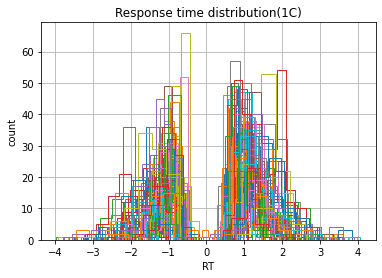

In [4]:
#flip the error RTs to be negative
data2C = hddm.utils.flip_errors(data2C)
# plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(1C)')
for i, subj_data in data2C.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM1C/rt_distribution(1C).png')

## Fitting the hierarchical model for one condition with no subject effects

In [5]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(data2C, depends_on={'t': 'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname=f'./fitting_results/HDDM/HDDM2C/traces2c(t_trial).db', db='pickle')
m.save(f'./fitting_results/HDDM/HDDM2C/HDDM2C(t_trial)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1907.9 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t(101)
Plotting t(102)
Plotting t_std
Plotting z
Plotting z_std


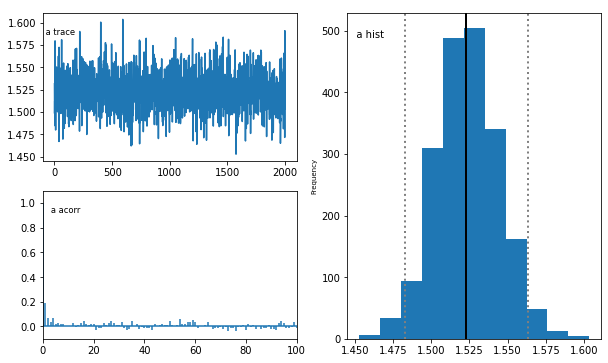

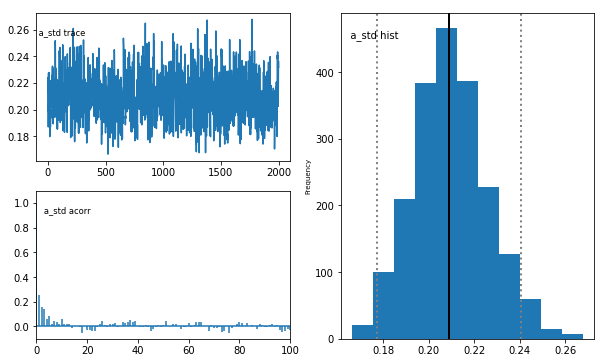

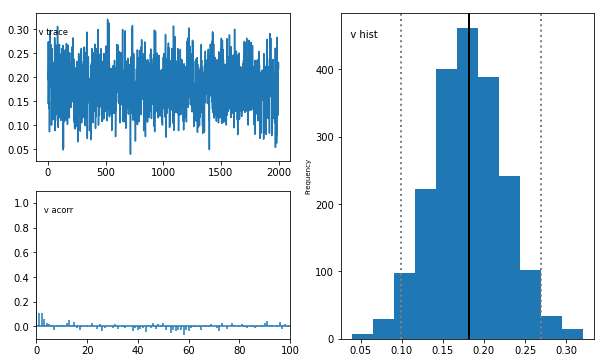

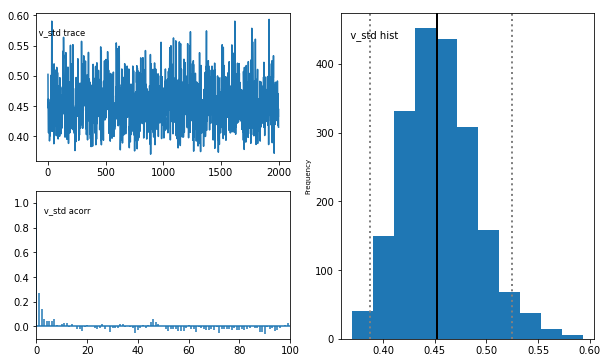

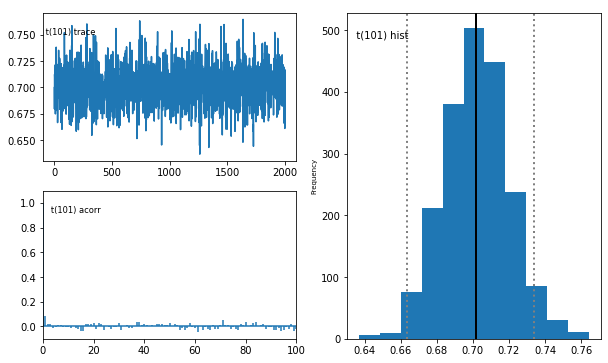

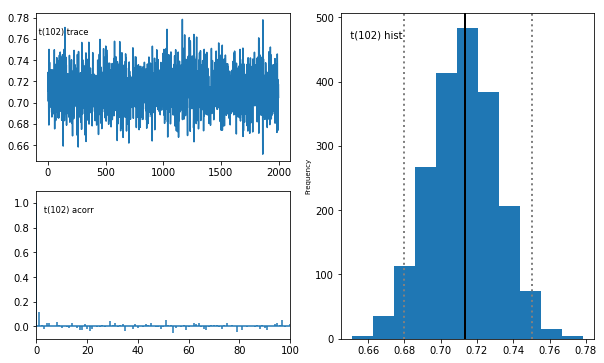

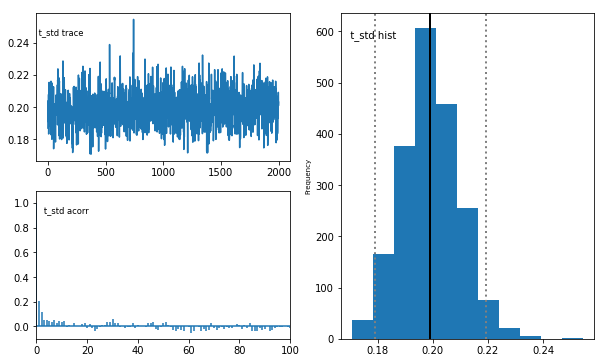

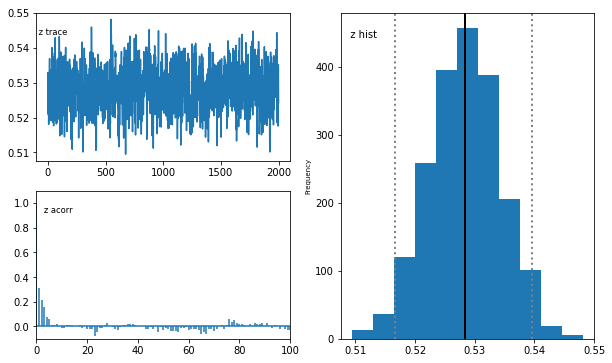

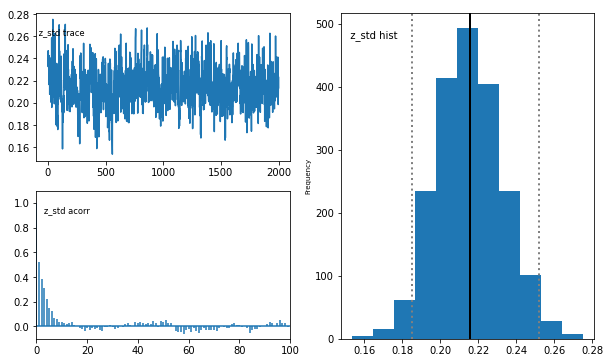

In [6]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [72]:
stats2Ct = m.gen_stats()
stats2Ct.to_csv('./fitting_results/HDDM/HDDM2C/HDDM2Ct.csv')
stats2Ct[stats2Ct.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.52342,0.0206874,1.48345,1.5097,1.52305,1.53742,1.56457,0.000634741
a_std,0.20969,0.0160989,0.1799,0.198929,0.209143,0.219636,0.244046,0.000581244
v,0.181404,0.0436824,0.0989294,0.15256,0.181706,0.210472,0.268976,0.00126161
v_std,0.455106,0.0355741,0.392787,0.42966,0.452446,0.477372,0.536872,0.00119194
t_std,0.199323,0.0104276,0.179827,0.192431,0.198992,0.206132,0.220384,0.000354322
z,0.528298,0.0059622,0.51666,0.524285,0.528381,0.53233,0.539541,0.000210942
z_std,0.215445,0.0175383,0.182801,0.202999,0.215578,0.226635,0.250835,0.000815281


In [90]:
data = pd.read_csv('./fitting_results/HDDM/HDDM2C/HDDM2Ct.csv', header=None, names=['lable', 'mean', 'std', '2.5q', '25q', '50q', '75q', '97.5q', 'mc err'])
data.dropna(subset=['lable'],inplace=True)


In [91]:
t_a = data[data['lable'].str.startswith('a')]
t_a = t_a.iloc[2:]
t_a = t_a.drop(t_a.columns[[2,3,4,5,6,7,8]], axis=1)
t_a['lable'] = t_a['lable'].str.replace('a_subj.', '')
print(t_a)

                lable                mean
3    00aa64fdcb675341   1.473641935271974
4    02535fcf7e16bb56  1.3578086119857136
5    06c46b112368babf  1.4847029686544588
6    09ba82a2ca814481  1.4095325887526733
7    0abfc32a4d12c731  1.6590881489537646
..                ...                 ...
113  f205d1277e6ea6b4  1.8779188495625898
114  f39ae9088896b47f  1.5701613413211786
115  f98444c434d40f8b  1.3197640008624794
116  fc7ef2c5b91399c2  1.3913219897637754
117  ff1d7a9a28686c2b   1.650604805714376

[115 rows x 2 columns]


In [95]:
t_v = data[data['lable'].str.startswith('v')]
t_v = t_v.iloc[2:]
t_v = t_v.drop(t_v.columns[[2,3,4,5,6,7,8]], axis=1)
t_v['lable'] = t_v['lable'].str.replace('v_subj.', '')
print(t_v)

                lable                 mean
120  00aa64fdcb675341   0.6179241832103917
121  02535fcf7e16bb56    0.479793128459963
122  06c46b112368babf   0.4991273914605204
123  09ba82a2ca814481   0.6405194689129139
124  0abfc32a4d12c731  0.10799506767895452
..                ...                  ...
230  f205d1277e6ea6b4  0.19243820980598192
231  f39ae9088896b47f   0.4938398378075326
232  f98444c434d40f8b   0.8203196197220212
233  fc7ef2c5b91399c2  -0.5180772042585522
234  ff1d7a9a28686c2b  0.15377930819823268

[115 rows x 2 columns]


In [55]:
vartype = type(stats2Ct)
print(vartype)

<class 'pandas.core.frame.DataFrame'>


In [32]:
m = hddm.load(f'./fitting_results/HDDM/HDDM2C/HDDM2C(t_trial)')

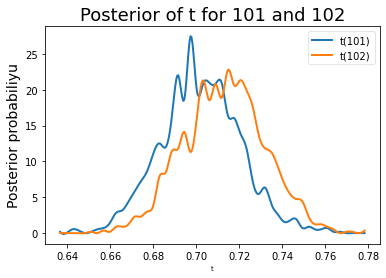

In [58]:
t_101, t_102 = m.nodes_db.node[['t(101)', 't(102)']]
hddm.analyze.plot_posterior_nodes([t_101, t_102])
plt.xlabel('t', fontsize=7)
plt.ylabel('Posterior probabiliyu', fontsize=14)
plt.title('Posterior of t for 101 and 102', fontsize=18)
plt.savefig('./fitting_results/HDDM/HDDM2C/posterior_t(101,102).png')

In [34]:
print("P_t(101 > 102) = ", (t_101.trace() > t_102.trace()).mean())

P_t(101 > 102) =  0.32


In [35]:
m.dic

31281.595009927612

## Check for Model convergence

In [8]:
# Set up models list to append results
models2Ct = list()

In [9]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C/chain2Ct_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C/chain2CtCON_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [10]:
num_chains = 5
data_chains = [(data2C,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2Ct = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 3Fitting chain 0Fitting chain 2Fitting chain 1



Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------98%----------------- ] 2954 of 3000 complete in 1042.4 sec              0%                  ] 3 of 3000 complete in 0.7 sec  [                  0%                  ] 3 of 3000 complete in 0.7 sec [                  0%                  ] 3 of 3000 complete in 0.7 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 7 of 3000 complete in 2.1 sec[                  0%                  ] 7 of 3000 complete in 2.1 sec[                  0%                  ] 7 of 3000 complete in 2.1 sec [                  0%                  ] 7 of 3000 complete in 2.1 sec[                  0%                  ] 9 of 3000 complete in 2.8 sec[              

In [11]:
models2Ct

In [25]:
results = hddm.analyze.gelman_rubin(models2Ct)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0000609639295401
a_std: 1.001153832225185
a_subj.00aa64fdcb675341: 1.0000706997501945
a_subj.02535fcf7e16bb56: 1.0025696203807277
a_subj.06c46b112368babf: 1.000282256211633
a_subj.09ba82a2ca814481: 1.0001840185923974
a_subj.0abfc32a4d12c731: 1.0001364324811184
a_subj.0b0a94c202d0b233: 0.999985651616031
a_subj.0beac20378edac7b: 1.0008423403002897
a_subj.0d894551bc966608: 1.0016032148449159
a_subj.10d15198ac61a404: 1.0007864298777158
a_subj.12a096342c4d052f: 1.000203362047903
a_subj.13e347e32a454872: 1.0003050874360535
a_subj.15e0c065b2c11595: 1.000348049759343
a_subj.163b12703c8e5c3c: 1.000447128741547
a_subj.1bf86ff948486447: 0.9997840423943654
a_subj.1cb976bac3a2016b: 1.0003854871755438
a_subj.1ffdcfc59b83c43a: 1.0021902198126775
a_subj.221e9f16c114b2c0: 1.000611008188537
a_subj.22d84796012679e8: 0.9999523824488589
a_subj.247384e4eccc4f80: 1.0010921763964828
a_subj.2737c4b829b3018f: 0.9998998028670015
a_subj.27902f23b60a7b76: 1.0004813665282444
a_subj.279cd1540fc8f71f: 1.00003356

In [26]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{}

Values smaller than the threshold:
{}


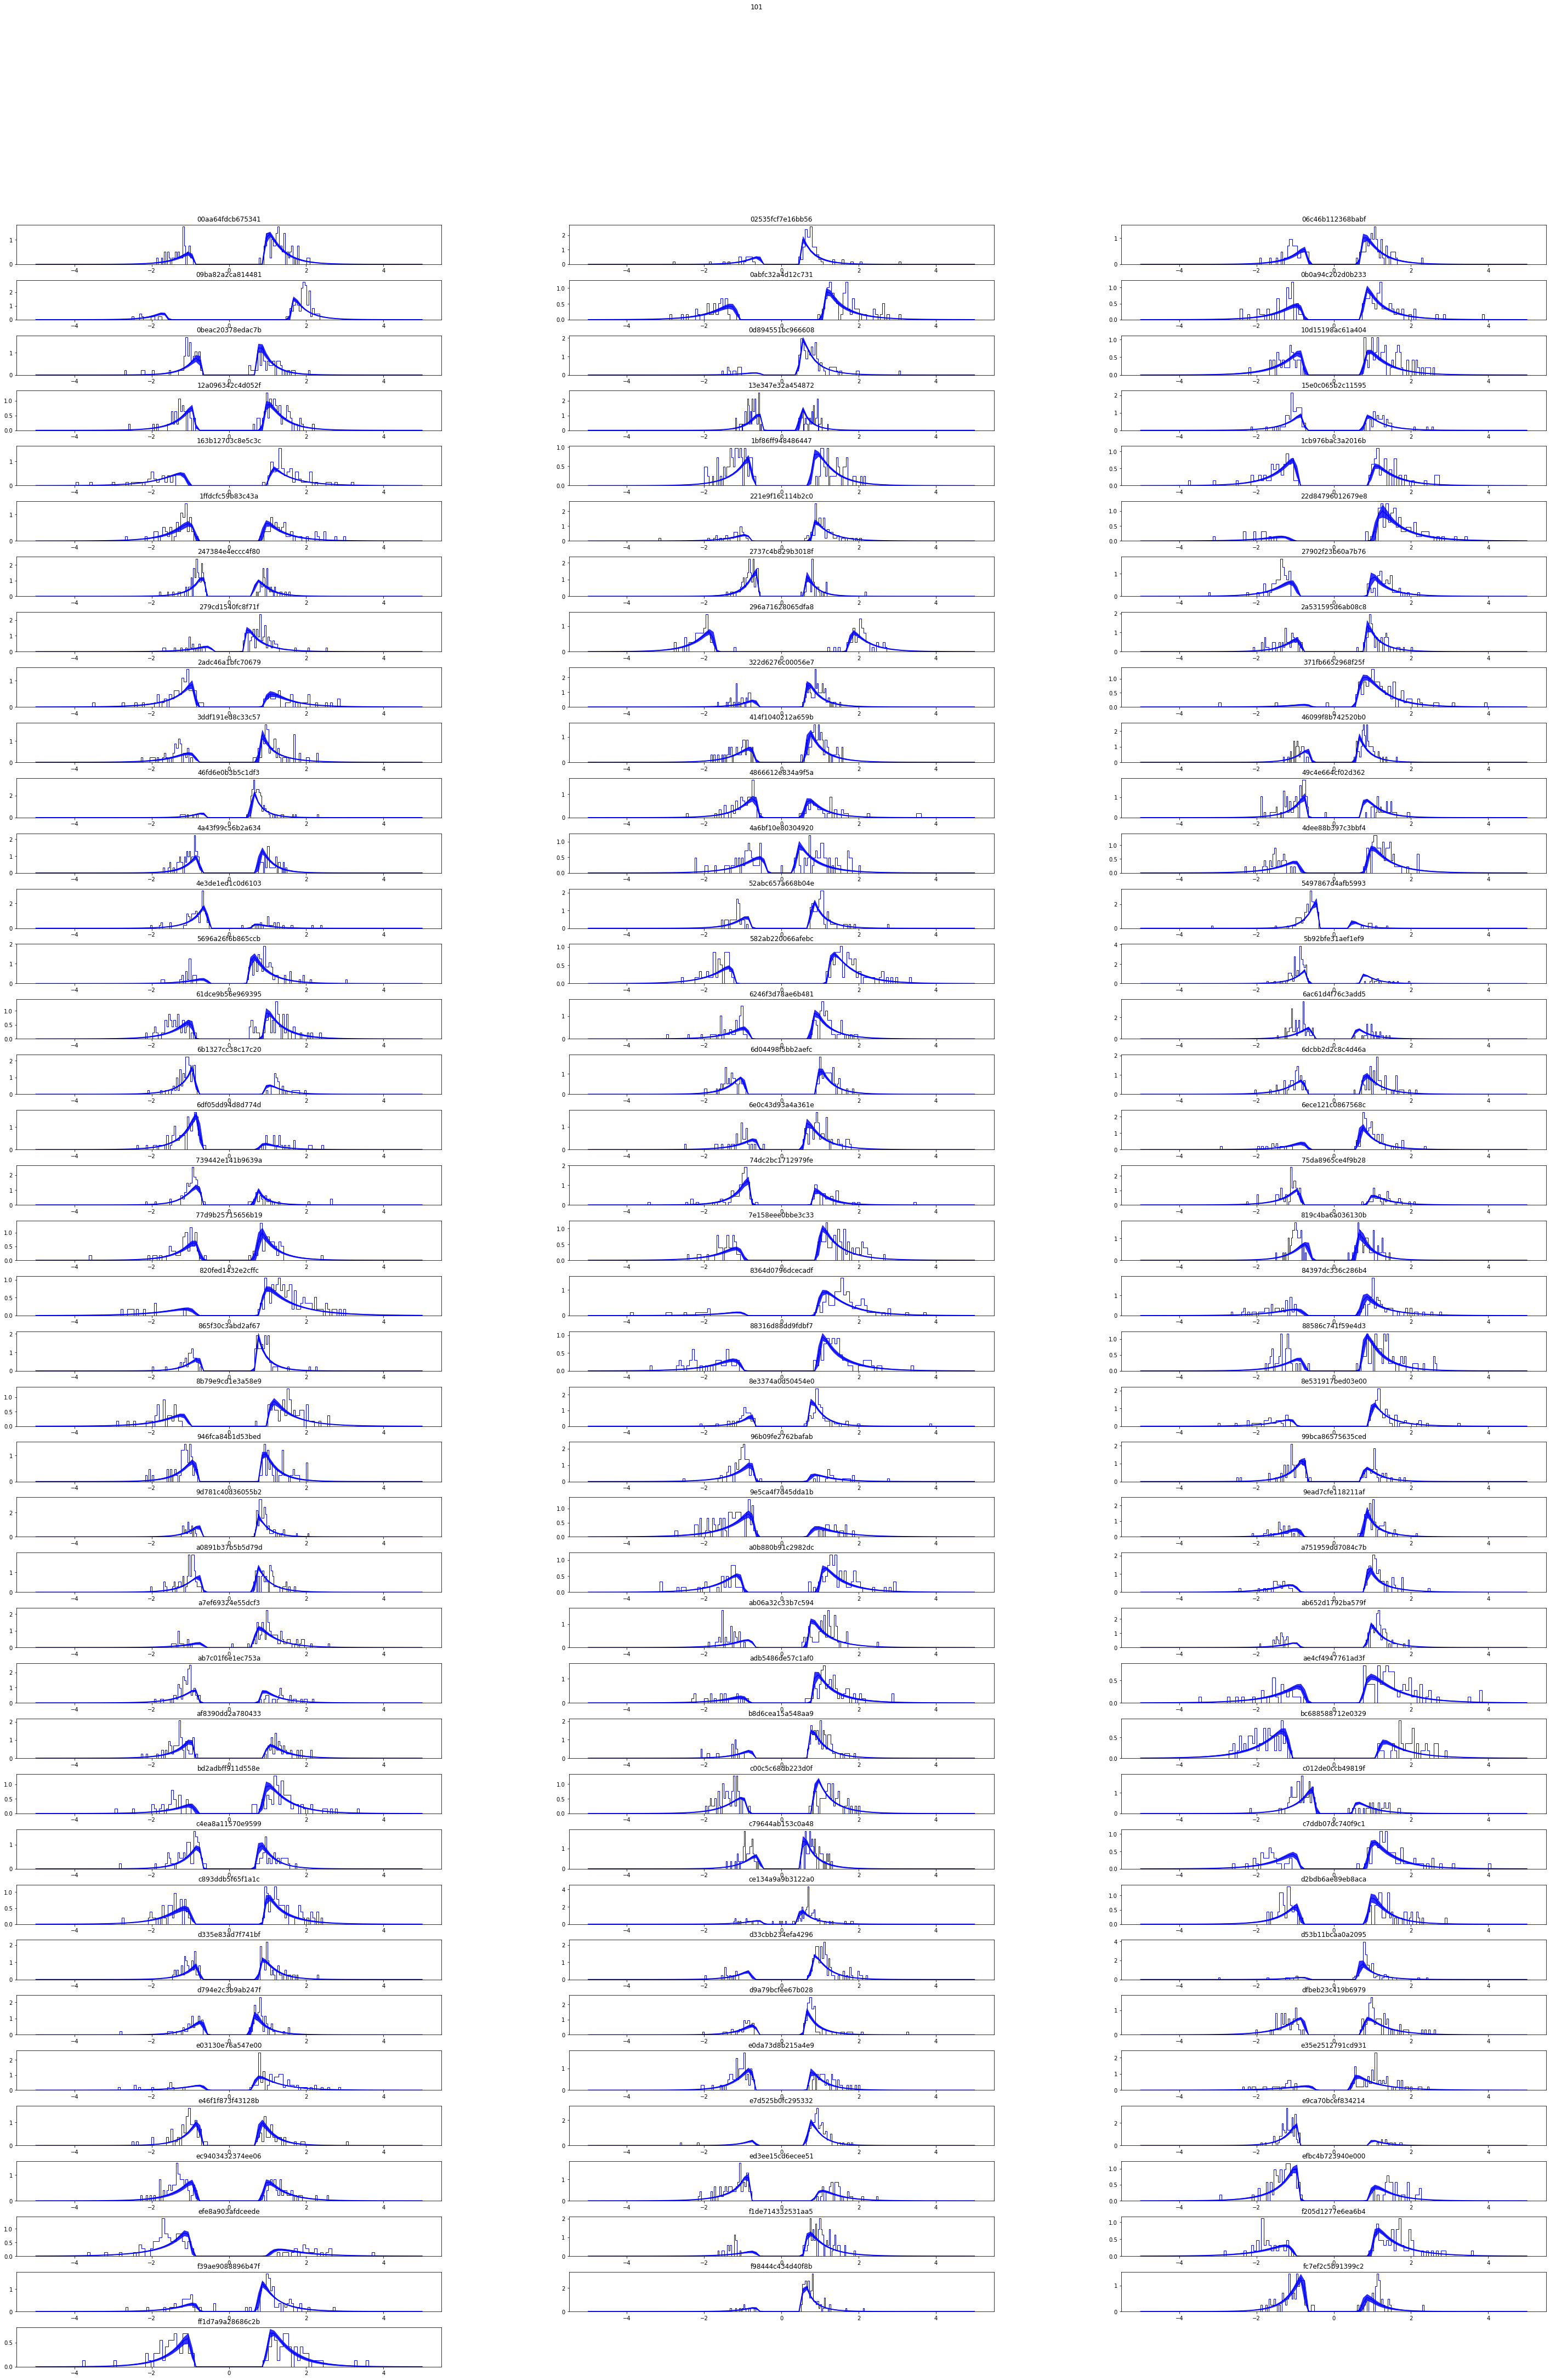

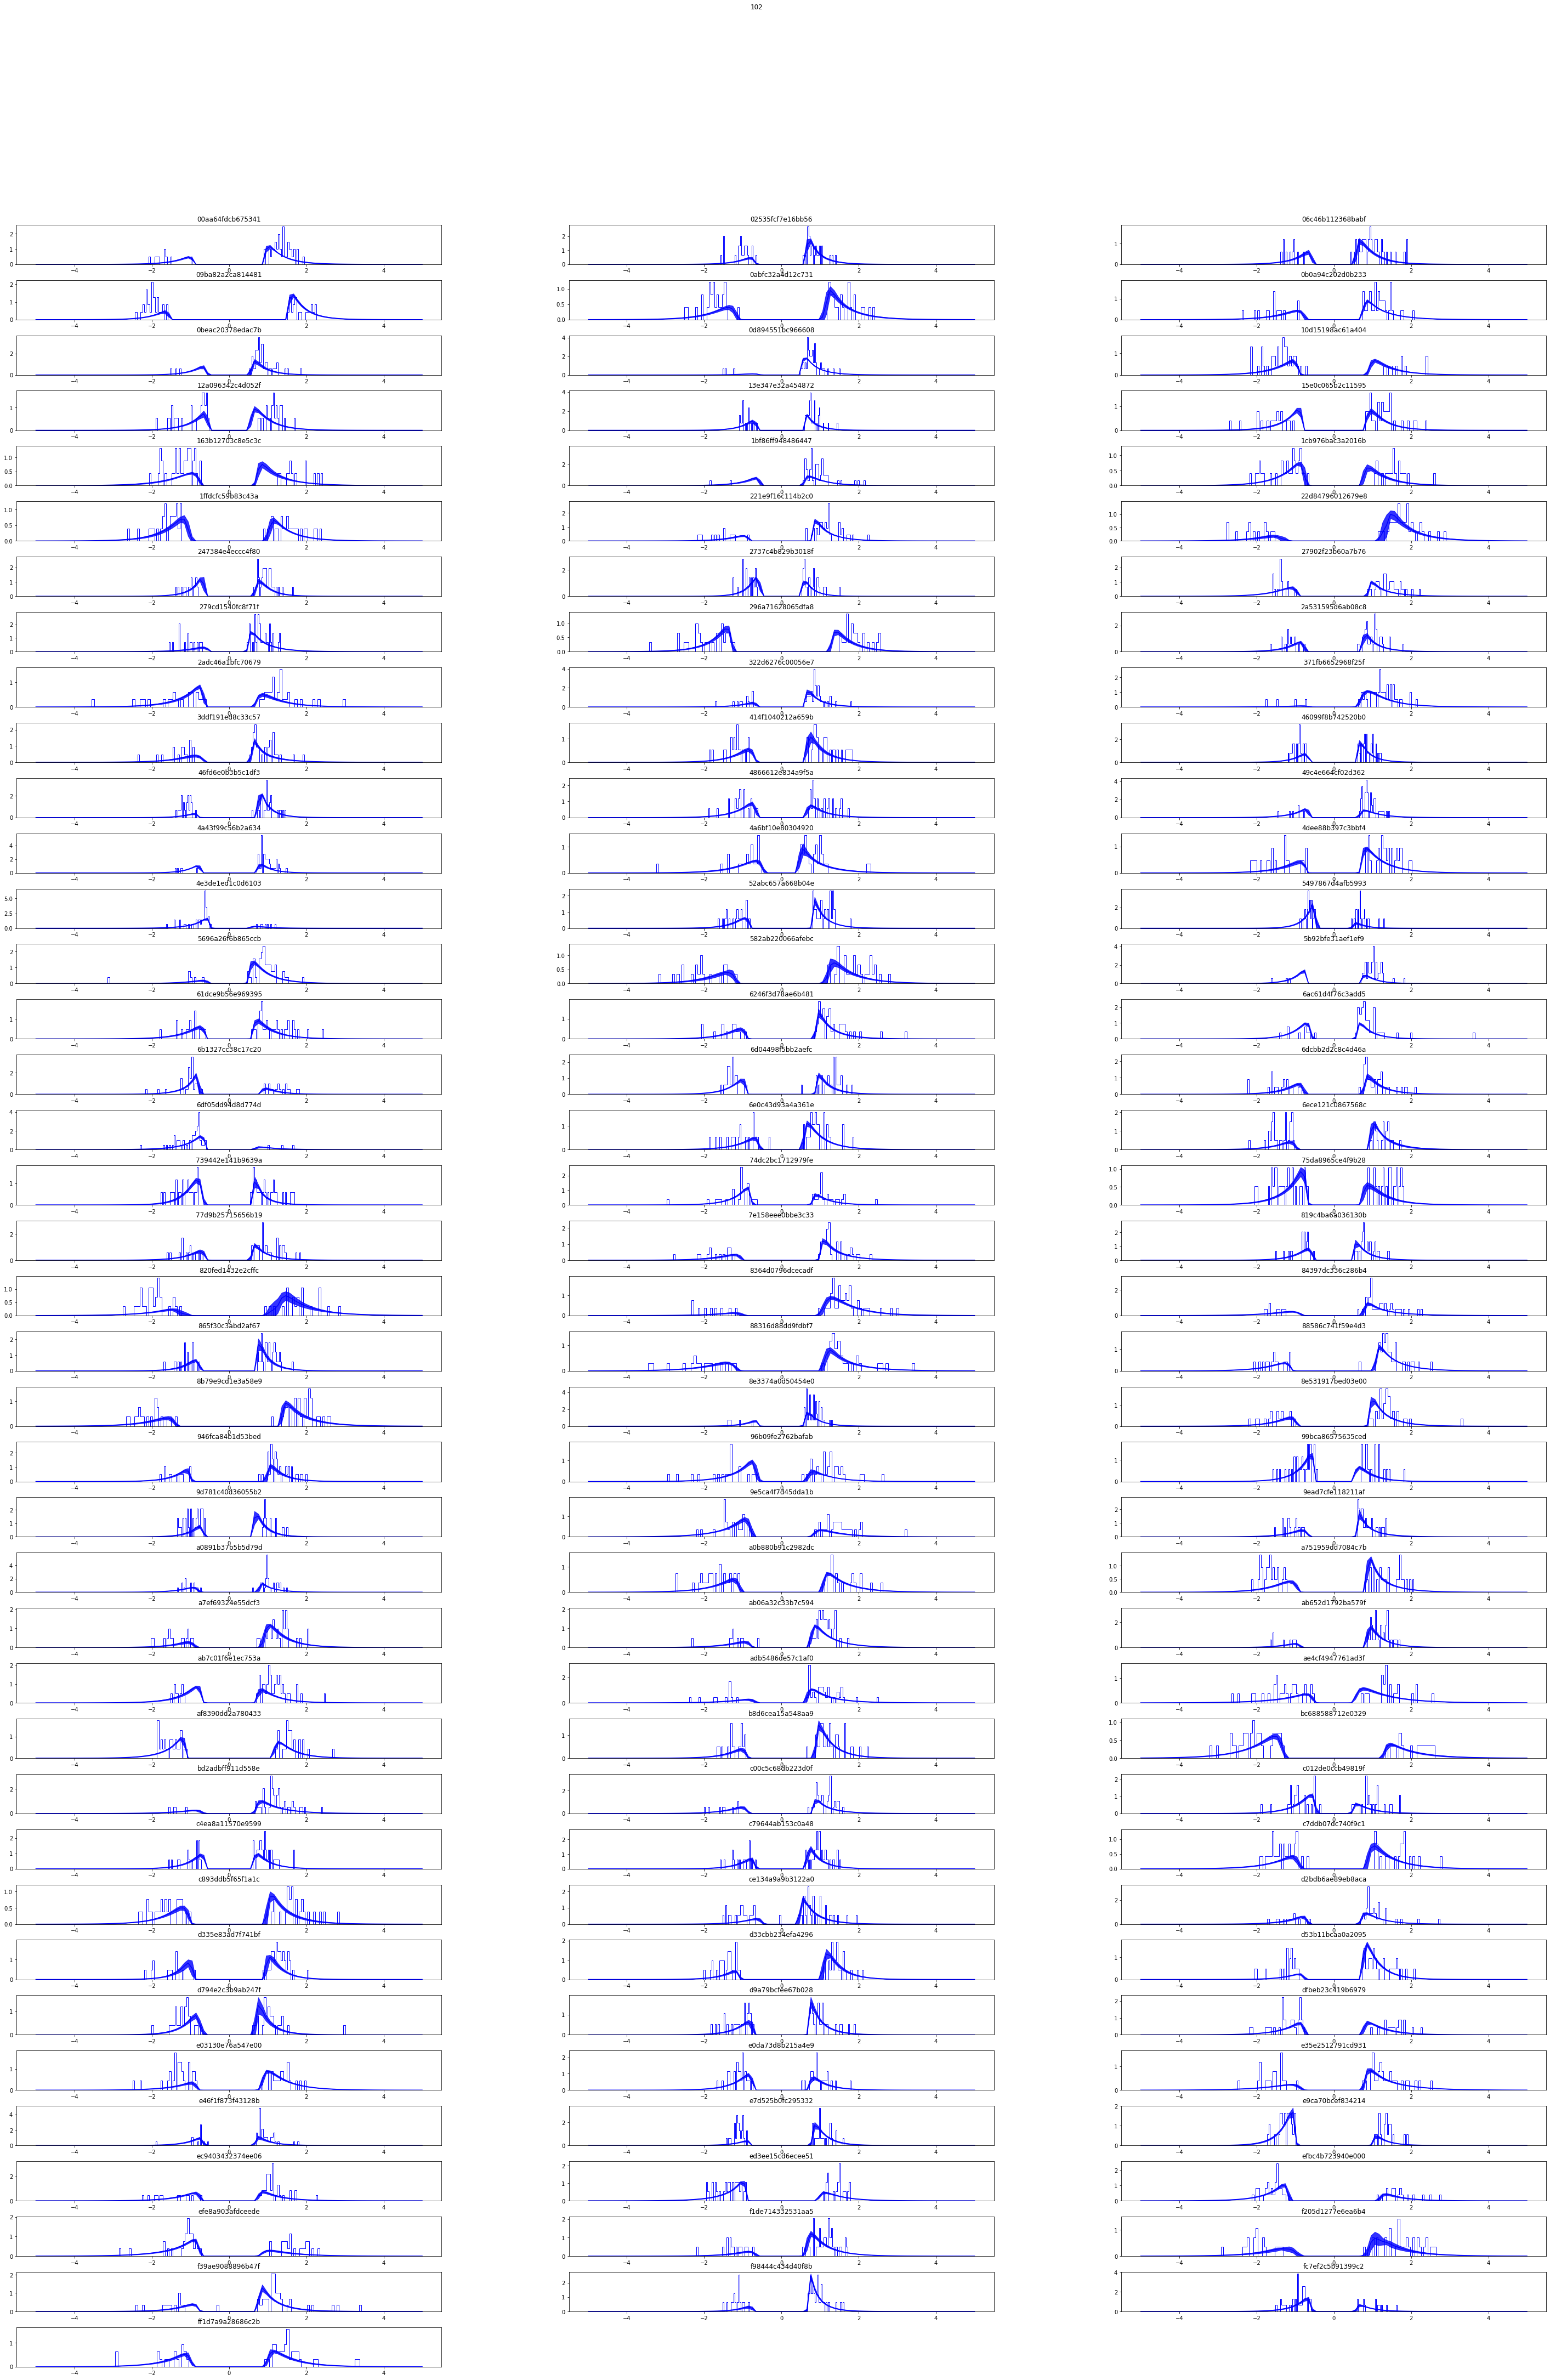

In [22]:
m.plot_posterior_predictive(figsize=(50, 70))